# Python packages for playing with geospatial data

* haversine: computes straight line distance
* folum: python wrapper for leaflet.js

In [12]:
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting


import folium
# pip install folium
# https://folium.readthedocs.io/en/latest

from haversine import haversine, Unit
# pip install haversine
# https://pypi.python.org/pypi/haversine

import geocoder
# pip install geocoder
# https://pypi.python.org/pypi/geocoder

import shapefile
# pip install pyshp
# shapefile package: pyshp
# https://pypi.python.org/pypi/pyshp





import numpy as np
import requests

import seaborn as sns
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

import matplotlib
import matplotlib.pyplot as plt

# plot settings
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'regular',
        'size'   : 13}
figure = {'figsize' : (10,8)}

matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# simplified method using geocoder package
# NOTE that I *highly* recommend you get an API key from
    # google and use geocoder.google instead of geocoder.geocodefarm

g = geocoder.geocodefarm('Price Center, La Jolla, CA')
g.json


{'accuracy': 'EXACT_MATCH',
 'address': 'La Jolla, CA, United States',
 'bbox': {'northeast': [32.8313713073537, -117.272743221921],
  'southwest': [32.8499908447538, -117.247436523192]},
 'confidence': 7,
 'country': 'United States',
 'county': 'San Diego County',
 'elevation': 'UNAVAILABLE',
 'lat': 32.8426513671538,
 'lng': -117.272201538192,
 'ok': True,
 'raw': {'formatted_address': 'La Jolla, CA, United States',
  'accuracy': 'EXACT_MATCH',
  'ADDRESS': {'admin_2': 'San Diego County',
   'admin_1': 'CA',
   'country': 'United States'},
  'LOCATION_DETAILS': {'elevation': 'UNAVAILABLE',
   'timezone_long': 'UNAVAILABLE',
   'timezone_short': 'America/Los_Angeles'},
  'COORDINATES': {'latitude': '32.8426513671538',
   'longitude': '-117.272201538192'},
  'BOUNDARIES': {'northeast_latitude': '32.8313713073537',
   'northeast_longitude': '-117.272743221921',
   'southwest_latitude': '32.8499908447538',
   'southwest_longitude': '-117.247436523192'}},
 'state': 'CA',
 'status': 'OK',


In [14]:
print(g.latlng)

[32.8426513671538, -117.272201538192]


In [15]:
# reverse geocoding a lat/lng to an address
g = geocoder.geocodefarm(g.latlng, method='reverse')
g.json


{'accuracy': 'HIGH_ACCURACY',
 'address': '1030 Torrey Pines Rd, San Diego, CA 92037, United States',
 'bbox': {'northeast': [32.8390492824538, -117.278485858192],
  'southwest': [32.8467747175538, -117.266226141192]},
 'city': 'La Jolla',
 'confidence': 7,
 'country': 'United States',
 'county': 'San Diego Co.',
 'elevation': 'UNAVAILABLE',
 'housenumber': '1030',
 'lat': 32.842953809827,
 'lng': -117.272319213902,
 'ok': True,
 'postal': '92037',
 'raw': {'formatted_address': '1030 Torrey Pines Rd, San Diego, CA 92037, United States',
  'accuracy': 'HIGH_ACCURACY',
  'ADDRESS': {'street_number': '1030',
   'street_name': 'Torrey Pines Rd',
   'locality': 'La Jolla',
   'admin_2': 'San Diego Co.',
   'admin_1': 'CA',
   'postal_code': '92037',
   'country': 'United States'},
  'LOCATION_DETAILS': {'elevation': 'UNAVAILABLE',
   'timezone_long': 'UNAVAILABLE',
   'timezone_short': 'America/Los_Angeles'},
  'COORDINATES': {'latitude': '32.8429538098270',
   'longitude': '-117.2723192139

In [16]:
# working with shapefiles
# neighborhood shapefile data from Zillow:
# https://www.zillow.com/howto/api/neighborhood-boundaries.htm

sf = shapefile.Reader("ZillowNeighborhoods-RI.shp")
shapes = sf.shapes()


In [17]:
 shapes[0].points

[(-71.36572999999999, 41.858280000000036),
 (-71.36396141399996, 41.85848524600004),
 (-71.36259364299997, 41.85864397700004),
 (-71.35926339599996, 41.85903045600003),
 (-71.33413851099994, 41.86194622200003),
 (-71.33439699999997, 41.86130000000003),
 (-71.33489699999996, 41.860600000000034),
 (-71.33719899999994, 41.855905000000064),
 (-71.33722731299997, 41.85584866000005),
 (-71.33722952299996, 41.855842489000054),
 (-71.33739699999995, 41.85550000000006),
 (-71.33739666999998, 41.855134306000025),
 (-71.33767399999994, 41.85501900000003),
 (-71.33820499999996, 41.85470900000007),
 (-71.33851199999998, 41.85460000000006),
 (-71.33888999999994, 41.854588000000035),
 (-71.33905199999998, 41.85454800000008),
 (-71.33921899999996, 41.854472000000044),
 (-71.33961199999999, 41.85435300000006),
 (-71.33972099999994, 41.854299000000026),
 (-71.33977099999998, 41.85422700000004),
 (-71.33978899999994, 41.85414700000007),
 (-71.33981299999994, 41.85362200000003),
 (-71.33983799999999, 41.8

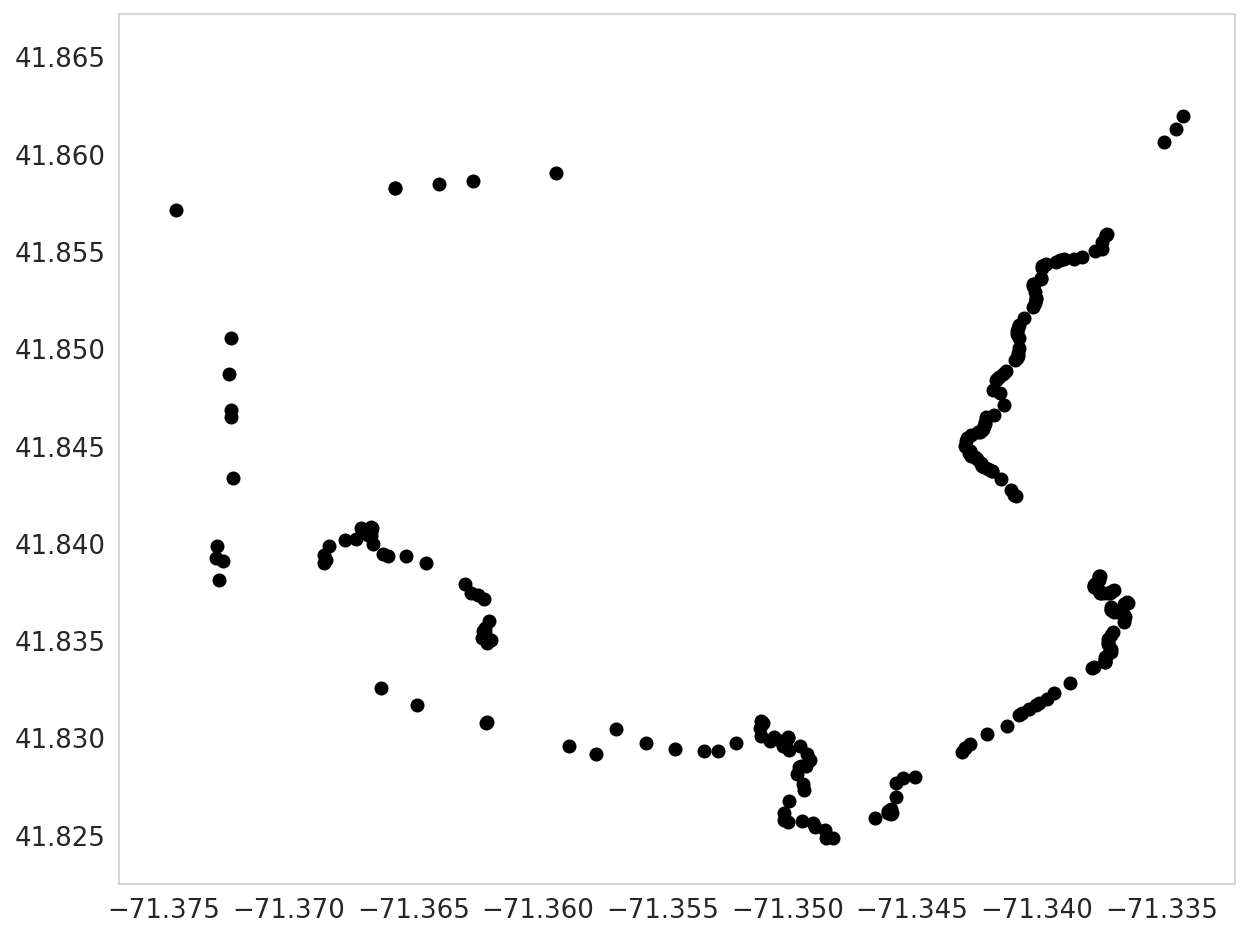

In [26]:
j=0
for i in range(len(shapes[j].points)):
    plt.scatter(shapes[j].points[i][0], shapes[j].points[i][1], c='k')

plt.show()

## Working with shapefiles
#### There are many issues with geospatial analyses, as I outlined in lecture.
#### One is how you aggregate data so that you can analyze them.
#### One way is to break up a geographic region into equally-size units (hexagonal tiling, for example).
#### But, for the sake of interpretability and intuitiveness, neighborhood boundaries work quite well.
#### Here's one way of doing that using shapefiles, which are just a way of storing geographic boundaries as sets of lat/lng pairs that outline a region and associate it with metadata about that region.
#### Thankfully the real estate website Zillow has done this hard work and made the shapefiles freely available.

In [27]:
# read the in the shapefile and list the methods associated with the object
sf = shapefile.Reader("ZillowNeighborhoods-CA.shp")
dir(sf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'record',
 'records',
 'shape',
 'shapeName'

In [28]:
# read in the dbf (metadata) file and list all the methods associated with it
sfdbf = shapefile.Reader("ZillowNeighborhoods-CA.dbf")
dir(sfdbf)

['_Reader__dbfHdrLength',
 '_Reader__dbfHeader',
 '_Reader__fieldposition_lookup',
 '_Reader__getFileObj',
 '_Reader__recStruct',
 '_Reader__record',
 '_Reader__recordFmt',
 '_Reader__recordLength',
 '_Reader__restrictIndex',
 '_Reader__shape',
 '_Reader__shapeIndex',
 '_Reader__shpHeader',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_offsets',
 'bbox',
 'close',
 'dbf',
 'encoding',
 'encodingErrors',
 'fields',
 'iterRecords',
 'iterShapeRecords',
 'iterShapes',
 'load',
 'load_dbf',
 'load_shp',
 'load_shx',
 'mbox',
 'numRecords',
 'record',
 'records',
 'shape',
 'shapeName'

In [29]:
metadata = sfdbf.shapeRecords()
metadata[38].record


Record #38: ['CA', 'San Diego', 'San Diego', 'Ocean Beach', '117021']

In [30]:
# find indices of all San Diego neighborhoods
sd_list = []
counter = 0

for i in range(len(metadata)):
    if metadata[i].record[2] == 'San Diego':
        sd_list.append(i)
        counter += 1


In [31]:
shapes = sf.shapes()

sd_shapes = []

for i in range(len(sd_list)):
    sd_shapes.append(shapes[sd_list[i]].points)

for i in range(len(sd_shapes)):
    for j in range(len(sd_shapes[i])):
        sd_shapes[i][j] = sd_shapes[i][j][::-1]


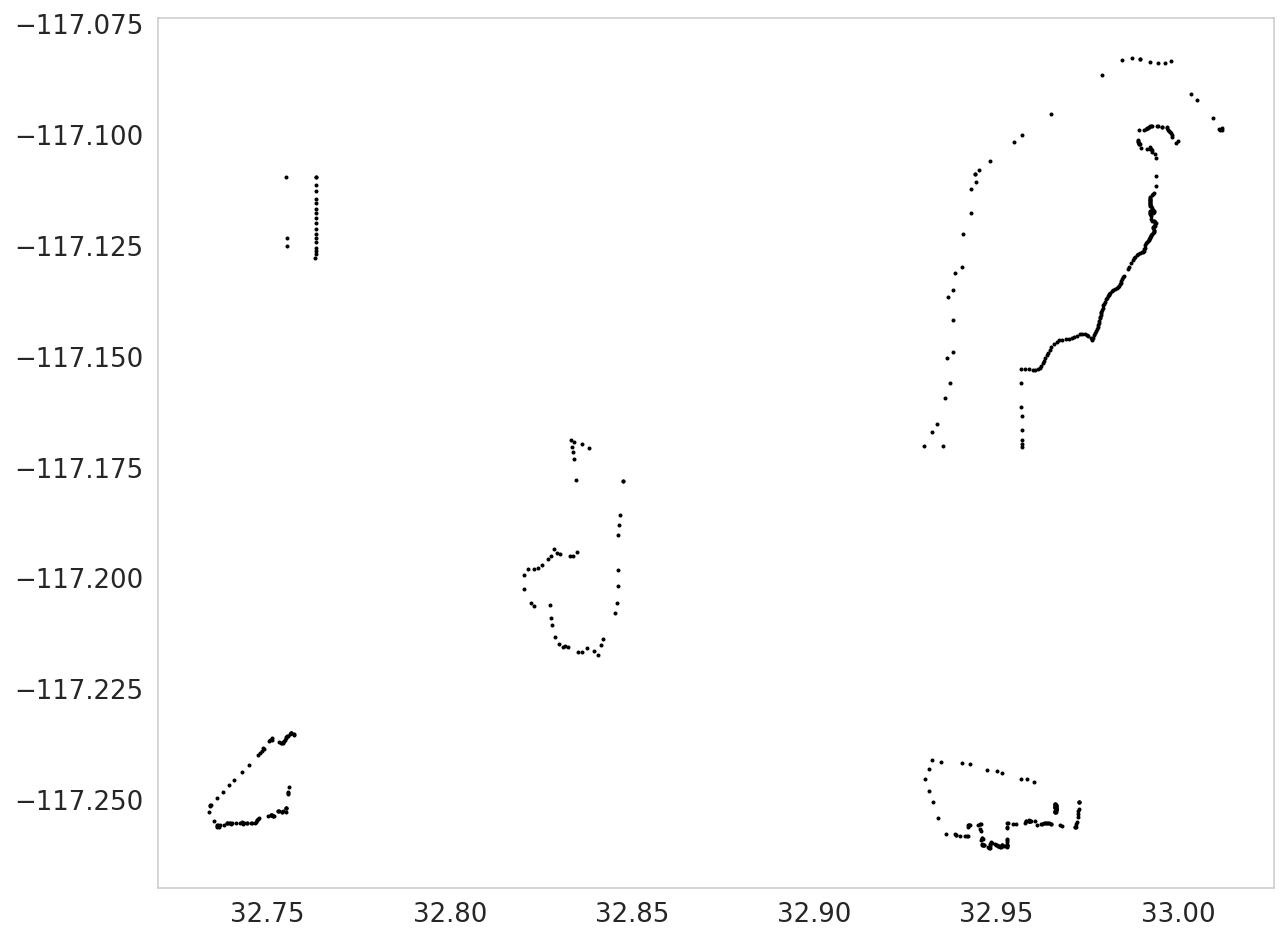

In [32]:
temp_shapes = sd_shapes[0:5]

for i in range(len(temp_shapes)):
    for j in range(len(temp_shapes[i])):
        plt.scatter(temp_shapes[i][j][0], temp_shapes[i][j][1], s=1, c='k')

plt.show()


In [33]:
# two coordinates

coordinate_1 = [32.8811, -117.2375]
coordinate_2 = [32.8709, -117.2108]


In [34]:
# Computes the distance between two points in kilometers
ditance_in_km = haversine(coordinate_1, coordinate_2)
ditance_in_km

2.7392662158871377

In [35]:
# Distance in miles
ditance_in_mi = haversine(coordinate_1, coordinate_2, unit=Unit.MILES)
ditance_in_mi

1.70210111377112

In [40]:
lat = coordinate_1[0]
lon = coordinate_1[1]
zoom_start = 14

m = folium.Map(location=[lat, lon], zoom_start=zoom_start)

kw = dict(fill_color='red', radius=20)
c0 = folium.CircleMarker(coordinate_1, **kw)
c1 = folium.CircleMarker(coordinate_2, **kw)

for c in [c0, c1]:
    m.add_child(c)

m

In [43]:
zoom_start = 10
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

for c in range(len(sd_shapes)):
    hood_line = folium.PolyLine(locations=sd_shapes[c], weight=2, color = 'blue')
    m.add_child(hood_line)

m


In [44]:
# GET COLORS HERE: http://colorbrewer2.org

zoom_start = 10
m = folium.Map(location=[lat, lon], zoom_start=zoom_start, tiles='Stamen Toner')

for c in range(len(sd_shapes)):
    hood_line = folium.features.PolyLine(locations=sd_shapes[c], color='#FF0000', fill_color='#fc8d50', weight=5)
    m.add_child(hood_line)

m